In the notebook, I evaluate the influence of the clip limit adopted in the apparent proper motion on the estimation of the global spin of the CRF.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, join


from my_progs.stat_func.rms_calc import rms_calc
from my_progs.catalog.ga_func import glide_apex_calc

from tool_func import vsh_fit_for_pm, vsh_fit_for_pm2

In [2]:
icrf3_def = Table.read("../data/icrf3sx-def-sou.txt", format="ascii")

In [3]:
def pre_parse_table(apm_tab, icrf3_def):
    """Do some pre-operations to APM table
    """
    
    # convert mas/yr into muas/yr
    apm_tab["pmra"] = apm_tab["pmra"] * 1e3
    apm_tab["pmra_err"] = apm_tab["pmra_err"] * 1e3
    apm_tab["pmdec"] = apm_tab["pmdec"] * 1e3
    apm_tab["pmdec_err"] = apm_tab["pmdec_err"] * 1e3
    
    # Remove sources without APM estimate
    mask = apm_tab["num_cln"] >= 5
    apm_tab = apm_tab[mask]
    
    # Table for the ICRF3 defining sources
    apm_def = join(icrf3_def, apm_tab, keys="iers_name")
    
    return apm_tab, apm_def 

In [4]:
def simple_vsh_func(data_file, icrf3_def):
    """
    """

    apm_tab = Table.read(data_file, format="ascii.csv")
    apm_tab, apm_def = pre_parse_table(apm_tab, icrf3_def)

    # VSH parameters
    pmt, sig, output = vsh_fit_for_pm(apm_def)
    pmt_all, sig_all, output_all = vsh_fit_for_pm(apm_tab)

    return pmt, sig, output, pmt_all, sig_all, output_all

In [5]:
# 1-sigma
results = simple_vsh_func("../data/ts_nju_pm_fit_1sigma-10step.dat", icrf3_def)

# VSH parameters
pmt1, sig1, output1 = results[:3]
pmt_all1, sig_all1, output_all1 = results[3:]

In [6]:
# 3-sigma
results = simple_vsh_func("../data/ts_nju_pm_fit_3sigma-10step.dat", icrf3_def)

# VSH parameters
pmt3, sig3, output3 = results[:3]
pmt_all3, sig_all3, output_all3 = results[3:]

In [7]:
# 5-sigma
results = simple_vsh_func("../data/ts_nju_pm_fit_5sigma-10step.dat", icrf3_def)

# VSH parameters
pmt5, sig5, output5 = results[:3]
pmt_all5, sig_all5, output_all5 = results[3:]

In [8]:
# 10-sigma
results = simple_vsh_func("../data/ts_nju_pm_fit_10sigma-10step.dat", icrf3_def)

# VSH parameters
pmt10, sig10, output10 = results[:3]
pmt_all10, sig_all10, output_all10 = results[3:]

In [9]:
# No outlier elimination
results = simple_vsh_func("../data/ts_nju_pm_fit_1000sigma-10step.dat", icrf3_def)

# VSH parameters
pmt, sig, output = results[:3]
pmt_all, sig_all, output_all = results[3:]

In [10]:
pmts = np.vstack((pmt1, pmt3, pmt5, pmt10, pmt)).T
sigs = np.vstack((sig1, sig3, sig5, sig10, sig)).T

pmts_all = np.vstack((pmt_all1, pmt_all3, pmt_all5, pmt_all10, pmt_all)).T
sigs_all = np.vstack((sig_all1, sig_all3, sig_all5, sig_all10, sig_all)).T

In [11]:
x_label = ["1", "3", "5", "10", "1000"]
x_axis = np.arange(len(x_label))

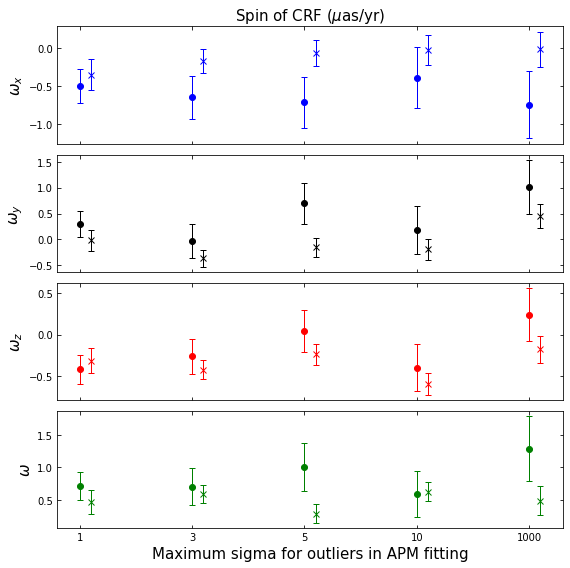

In [12]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(8, 8), nrows=4, sharex=True)

ax0.errorbar(x_axis,
             pmts[0],
             yerr=sigs[0],
             elinewidth=1,
             lw=0.5,
             fmt="o",
             color="b",
             capsize=3)
ax1.errorbar(x_axis,
             pmts[1],
             yerr=sigs[1],
             elinewidth=1,
             lw=0.5,
             fmt="o",
             color="k",
             capsize=3)
ax2.errorbar(x_axis,
             pmts[2],
             yerr=sigs[2],
             elinewidth=1,
             lw=0.5,
             fmt="o",
             color="r",
             capsize=3)
ax3.errorbar(x_axis,
             pmts[3],
             yerr=sigs[3],
             elinewidth=1,
             lw=0.5,
             fmt="o",
             color="g",
             capsize=3)

ax0.errorbar(x_axis + 0.1,
             pmts_all[0],
             yerr=sigs_all[0],
             elinewidth=1,
             lw=0.5,
             fmt="x",
             color="b",
             capsize=3)
ax1.errorbar(x_axis + 0.1,
             pmts_all[1],
             yerr=sigs_all[1],
             elinewidth=1,
             lw=0.5,
             fmt="x",
             color="k",
             capsize=3)
ax2.errorbar(x_axis + 0.1,
             pmts_all[2],
             yerr=sigs_all[2],
             elinewidth=1,
             lw=0.5,
             fmt="x",
             color="r",
             capsize=3)
ax3.errorbar(x_axis + 0.1,
             pmts_all[3],
             yerr=sigs_all[3],
             elinewidth=1,
             lw=0.5,
             fmt="x",
             color="g",
             capsize=3)

ax3.set_xticks(x_axis)
ax3.set_xticklabels(x_label)

ax3.set_xlabel("Maximum sigma for outliers in APM fitting", fontsize=15)
ax0.set_ylabel("$\\omega_x$", fontsize=15)
ax1.set_ylabel("$\\omega_y$", fontsize=15)
ax2.set_ylabel("$\\omega_z$", fontsize=15)
ax3.set_ylabel("$\\omega$", fontsize=15)

ax0.set_title("Spin of CRF ($\\mu$as/yr)", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/spin-vs-sigma.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


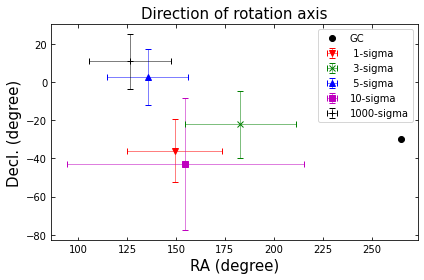

In [13]:
fig, ax = plt.subplots()

ax.errorbar(output1["R_ra"], output1["R_dec"],
            xerr=output1["R_ra_err"],
            yerr=output1["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="v", color="r", label=" 1-sigma")



ax.errorbar(output3["R_ra"], output3["R_dec"],
            xerr=output3["R_ra_err"],
            yerr=output3["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="x", color="g", label=" 3-sigma")

ax.errorbar(output5["R_ra"], output5["R_dec"],
            xerr=output5["R_ra_err"],
            yerr=output5["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="^", color="b", label=" 5-sigma")

ax.errorbar(output10["R_ra"], output10["R_dec"],
            xerr=output10["R_ra_err"],
            yerr=output10["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="s", color="m", label="10-sigma")

ax.errorbar(output["R_ra"], output["R_dec"],
            xerr=output["R_ra_err"],
            yerr=output["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="+", color="k", label="1000-sigma")


ax.plot(265, -30, "ko", label="GC")

ax.legend()

ax.set_title("Direction of rotation axis", fontsize=15)
ax.set_xlabel("RA (degree)", fontsize=15)
ax.set_ylabel("Decl. (degree)", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/spin-axis-vs-sigma.eps")

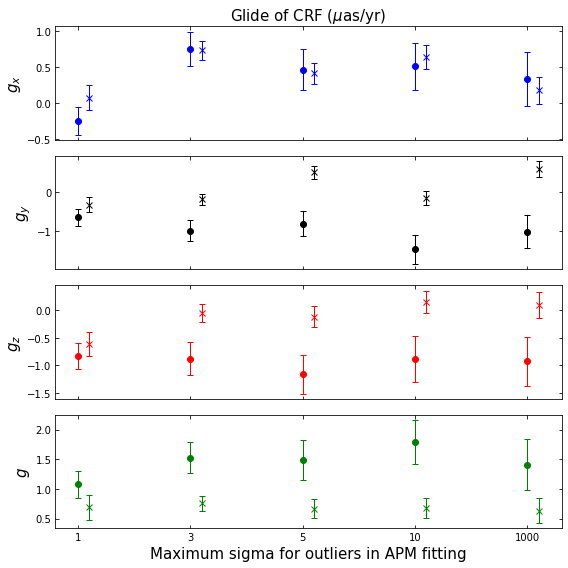

In [14]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(8, 8), nrows=4, sharex=True)

ax0.errorbar(x_axis,
             pmts[4],
             yerr=sigs[4],
             elinewidth=1,
             lw=0.5,
             fmt="o",
             color="b",
             capsize=3)
ax1.errorbar(x_axis,
             pmts[5],
             yerr=sigs[5],
             elinewidth=1,
             lw=0.5,
             fmt="o",
             color="k",
             capsize=3)
ax2.errorbar(x_axis,
             pmts[6],
             yerr=sigs[6],
             elinewidth=1,
             lw=0.5,
             fmt="o",
             color="r",
             capsize=3)
ax3.errorbar(x_axis,
             pmts[7],
             yerr=sigs[7],
             elinewidth=1,
             lw=0.5,
             fmt="o",
             color="g",
             capsize=3)

ax0.errorbar(x_axis + 0.1,
             pmts_all[4],
             yerr=sigs_all[4],
             elinewidth=1,
             lw=0.5,
             fmt="x",
             color="b",
             capsize=3)
ax1.errorbar(x_axis + 0.1,
             pmts_all[5],
             yerr=sigs_all[5],
             elinewidth=1,
             lw=0.5,
             fmt="x",
             color="k",
             capsize=3)
ax2.errorbar(x_axis + 0.1,
             pmts_all[6],
             yerr=sigs_all[6],
             elinewidth=1,
             lw=0.5,
             fmt="x",
             color="r",
             capsize=3)
ax3.errorbar(x_axis + 0.1,
             pmts_all[7],
             yerr=sigs_all[7],
             elinewidth=1,
             lw=0.5,
             fmt="x",
             color="g",
             capsize=3)

ax3.set_xticks(x_axis)
ax3.set_xticklabels(x_label)

ax3.set_xlabel("Maximum sigma for outliers in APM fitting", fontsize=15)
ax0.set_ylabel("$g_x$", fontsize=15)
ax1.set_ylabel("$g_y$", fontsize=15)
ax2.set_ylabel("$g_z$", fontsize=15)
ax3.set_ylabel("$g$", fontsize=15)

ax0.set_title("Glide of CRF ($\\mu$as/yr)", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/glide-vs-sigma.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


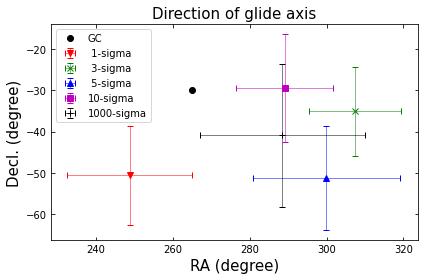

In [15]:
fig, ax = plt.subplots()

ax.errorbar(output1["G_ra"], output1["G_dec"],
            xerr=output1["G_ra_err"],
            yerr=output1["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="v", color="r", label=" 1-sigma")

ax.errorbar(output3["G_ra"], output3["G_dec"],
            xerr=output3["G_ra_err"],
            yerr=output3["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="x", color="g", label=" 3-sigma")

ax.errorbar(output5["G_ra"], output5["G_dec"],
            xerr=output5["G_ra_err"],
            yerr=output5["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="^", color="b", label=" 5-sigma")

ax.errorbar(output10["G_ra"], output10["G_dec"],
            xerr=output10["G_ra_err"],
            yerr=output10["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="s", color="m", label="10-sigma")

ax.errorbar(output["G_ra"], output["G_dec"],
            xerr=output["G_ra_err"],
            yerr=output["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="+", color="k", label="1000-sigma")

ax.plot(265, -30, "ko", label="GC")

ax.legend()

ax.set_title("Direction of glide axis", fontsize=15)
ax.set_xlabel("RA (degree)", fontsize=15)
ax.set_ylabel("Decl. (degree)", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/glide-axis-vs-sigma.eps")

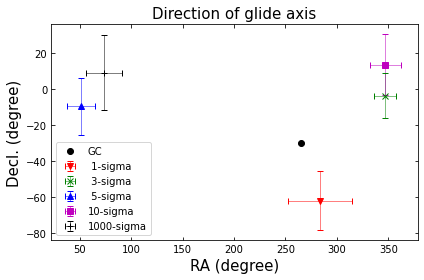

In [16]:
fig, ax = plt.subplots()

ax.errorbar(output_all1["G_ra"], output_all1["G_dec"],
            xerr=output_all1["G_ra_err"],
            yerr=output_all1["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="v", color="r", label=" 1-sigma")

ax.errorbar(output_all3["G_ra"], output_all3["G_dec"],
            xerr=output_all3["G_ra_err"],
            yerr=output_all3["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="x", color="g", label=" 3-sigma")

ax.errorbar(output_all5["G_ra"], output_all5["G_dec"],
            xerr=output_all5["G_ra_err"],
            yerr=output_all5["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="^", color="b", label=" 5-sigma")

ax.errorbar(output_all10["G_ra"], output_all10["G_dec"],
            xerr=output_all10["G_ra_err"],
            yerr=output_all10["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="s", color="m", label="10-sigma")

ax.errorbar(output_all["G_ra"], output_all["G_dec"],
            xerr=output_all["G_ra_err"],
            yerr=output_all["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="+", color="k", label="1000-sigma")

ax.plot(265, -30, "ko", label="GC")

ax.legend()

ax.set_title("Direction of glide axis", fontsize=15)
ax.set_xlabel("RA (degree)", fontsize=15)
ax.set_ylabel("Decl. (degree)", fontsize=15)

plt.tight_layout()
# plt.savefig("../plots/glide-axis-vs-sigma.eps")